<a href="https://colab.research.google.com/github/ShalomAlbert/Organic_or_Non-Organic_Waste_Image_Classification_using_VGG-16/blob/main/Organic_Non_Organic_Image_Classification_Using_VGG_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow

# Dataset Link: https://drive.google.com/drive/folders/1CTvT_gnTvwlcKwJ8yz4jUOs0JYTKrplA?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Here we are fetching a file called **Organic or Non-Organic** frome the Directory which has **9 sub-folders(classes)** in which **each classes has thousands of image which determines the classification**

In [ ]:
# prepare the data and generate the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen_train = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2,
                               brightness_range = (0.1, 0.5), horizontal_flip=True)

train_data = gen_train.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/Image_classification/recycling waste",
                                           target_size = (224, 224), batch_size = 32, class_mode="categorical")


Found 8369 images belonging to 9 classes.


# The 9 classes I used are
**+Non-Organic Waste** -"batteries", "clothes", "e-waste", "glass", "light blubs", "metal", "paper" "plastic"
\
**+Organic Waste**-"organic"

In [ ]:
# creating a model

from tensorflow.keras.applications.vgg16 import VGG16

# include_top = False means i want to add my own input, flatten and output layer

vgg16 = VGG16(input_shape = (224, 224, 3), weights = "imagenet", include_top = False)

In [ ]:
# vgg16 weights are already trained so i don't want to train those weights again

for layer in vgg16.layers:
  layer.trainable = False

In [ ]:
# Adding VGG16 with our own flatten layer

from tensorflow.keras import layers

x = layers.Flatten()(vgg16.output)

In [ ]:
# adding output layers

prediction = layers.Dense(units = 9, activation="softmax")(x)

# model created

model = tf.keras.models.Model(inputs = vgg16.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# compile the model

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])

result = model.fit_generator(train_data, epochs = 28, steps_per_epoch=len(train_data))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/28
262/262 [==============================] - 170s 614ms/step - loss: 2.0931 - accuracy: 0.2906
Epoch 2/28
262/262 [==============================] - 159s 608ms/step - loss: 1.5903 - accuracy: 0.4493
Epoch 3/28
262/262 [==============================] - 159s 608ms/step - loss: 1.4737 - accuracy: 0.4902
Epoch 4/28
262/262 [==============================] - 160s 610ms/step - loss: 1.4170 - accuracy: 0.5115
Epoch 5/28
262/262 [==============================] - 160s 609ms/step - loss: 1.3239 - accuracy: 0.5421
Epoch 6/28
262/262 [==============================] - 160s 611ms/step - loss: 1.3280 - accuracy: 0.5446
Epoch 7/28
262/262 [==============================] - 160s 609ms/step - loss: 1.2971 - accuracy: 0.5528
Epoch 8/28
262/262 [==============================] - 159s 608ms/step - loss: 1.2099 - accuracy: 0.5857
Epoch 9/28
262/262 [==============================] - 159s 606ms/step - loss: 1.1950 - accuracy: 0.5932
Epoch 10/28
262/262 [==============================] - 159s 607m

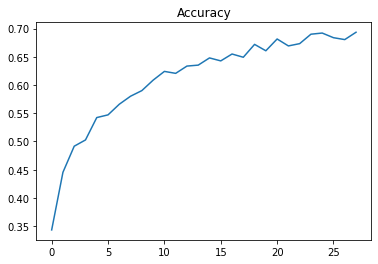

In [ ]:
plt.title("Accuracy")
plt.plot(result.history["accuracy"])
plt.show()

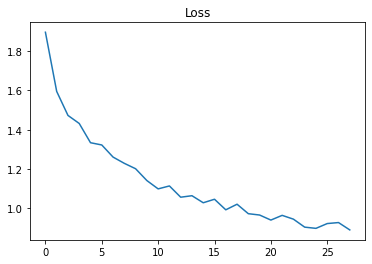

In [ ]:
plt.title("Loss")
plt.plot(result.history["loss"])
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/Image_classification/classification.h5")